In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = pd.read_csv("Agri.csv",encoding = 'UTF-8')
dataset = pd.DataFrame(dataset)
dataset.head()

,Annual_Pre,srad_02,srad_08,srad_09,srad_10,srad_11,srad_12,mean_srad,wind_11,water_vapo,...,NIR_8,RED_9,SWIR_7,SWIR_9,Iron_oxide_7,Iron_oxide_8,Iron_oxide_9,Ipvi_8,Ipvi_9,OC
0,1156,6945,15325,12058,8273,4475,3366,10981.33333,2.1,0.729167,...,0.2975,0.0340,0.1410,0.1295,2.689655,1.904762,5.666667,0.881481,0.877034,67.0
1,574,8881,21948,16777,11098,7179,5347,14664.00000,1.4,0.944167,...,0.2455,0.0900,0.2605,0.2090,2.138298,1.818182,1.956522,0.690577,0.732938,67.0
2,541,4480,16019,10543,5856,2501,1582,10297.91667,3.9,0.888333,...,0.3010,0.0895,0.2390,0.2605,1.883721,1.553398,1.467213,0.790026,0.771684,67.0
3,934,5644,16607,11696,6853,3481,2362,10801.00000,3.4,0.955833,...,0.2775,0.0350,0.1400,0.1230,1.571429,1.523810,3.684211,0.896607,0.875445,67.0
4,890,6173,16334,11628,7118,3641,2641,10783.66667,1.8,0.934167,...,0.2475,0.0975,0.1975,0.2120,1.532787,1.671642,1.611570,0.688456,0.704097,67.0


In [16]:
#Description of data used for prediction
dataset.describe().apply(lambda x:round(x,2))

,Annual_Pre,srad_02,srad_08,srad_09,srad_10,srad_11,srad_12,mean_srad,wind_11,water_vapo,...,NIR_8,RED_9,SWIR_7,SWIR_9,Iron_oxide_7,Iron_oxide_8,Iron_oxide_9,Ipvi_8,Ipvi_9,OC
count,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,...,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00,10760.00
mean,677.11,7287.84,19046.20,13888.83,8893.57,5147.56,3736.58,12725.69,3.11,1.01,...,0.29,0.09,0.23,0.23,1.88,1.92,2.27,0.73,0.74,18.85
std,206.28,2219.55,3076.48,2827.08,2435.16,2142.83,1811.72,2295.59,1.03,0.13,...,0.04,0.04,0.07,0.07,0.42,0.46,1.49,0.09,0.09,12.10
min,220.00,2443.00,12237.00,7637.00,2991.00,801.00,239.00,8214.17,0.50,0.64,...,0.13,0.01,0.09,0.04,0.88,0.88,0.71,0.54,0.54,0.10
25%,535.00,5386.00,16249.00,11298.00,6771.75,3314.75,2198.75,10621.73,2.50,0.91,...,0.27,0.06,0.18,0.18,1.57,1.60,1.83,0.66,0.67,10.60
50%,641.00,7109.50,18709.00,13931.00,8802.00,4736.00,3343.50,12501.50,3.00,0.99,...,0.29,0.08,0.22,0.21,1.80,1.84,2.09,0.73,0.74,15.40
75%,782.00,9029.00,21862.00,16342.75,11026.00,6972.25,5142.00,14735.46,3.80,1.07,...,0.32,0.11,0.27,0.26,2.16,2.17,2.42,0.80,0.81,23.40
max,2387.00,12591.00,26234.00,22113.00,16645.00,12240.00,9044.00,18996.67,7.50,1.63,...,0.52,0.29,0.52,0.49,4.33,6.44,80.00,0.92,0.96,67.00


In [21]:
top10 = pd.read_csv("Agri_top10.csv",encoding = 'UTF-8')
# top10 = dataset.values

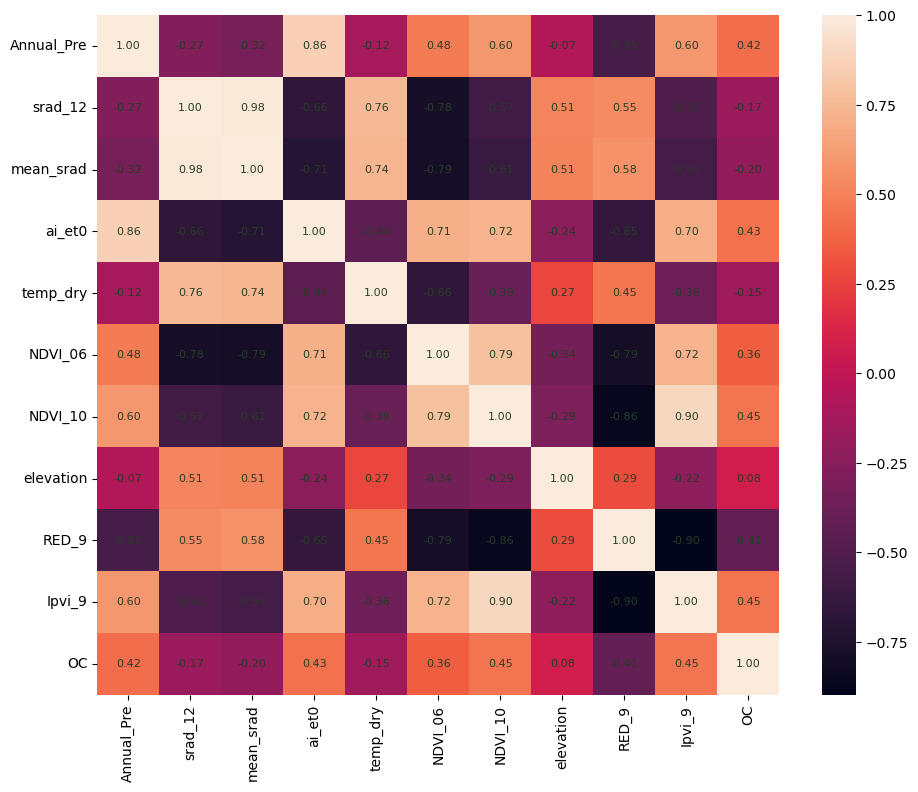

In [26]:
dcorr = top10.corr(method='pearson')
plt.figure(figsize=(11, 9),dpi=100)
fig = sns.heatmap(data=dcorr,
                        annot=True,#图中数字文本显示
            fmt=".2f",#格式化输出图中数字，即保留小数位数等
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
           )

In [29]:
# fig = ax.get_figure()
fig.savefig('corr.jpg', dpi=400,bbox_inches = 'tight')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

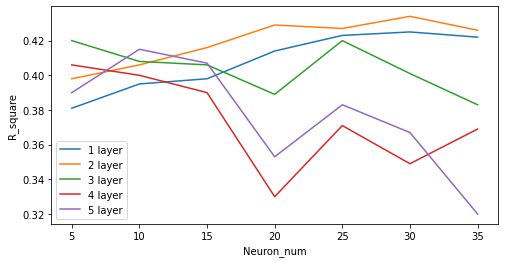

In [46]:
R1 = [0.381,0.395,0.398,0.414,0.423,0.425,0.422]
R2 = [0.398,0.406,0.416,0.429,0.427,0.434,0.426]
R3 = [0.420,0.408,0.406,0.389,0.420,0.401,0.383]
R4 = [0.406,0.4,0.39,0.33,0.371,0.349,0.369]
R5 = [0.39,0.415,0.407,0.353,0.383,0.367,0.32]

# R2 = 
df = pd.DataFrame({'1 layer':R1,'2 layer':R2,'3 layer':R3,'4 layer':R4,'5 layer':R5})#,index = ['5','10','15','20','25','30','35'])
df.index = ['5','10','15','20','25','30','35']
fig = df.plot(figsize=(8,4))
plt.ylabel('R_square') # y轴标签
plt.xlabel('Neuron_num') # y轴标签
plt.legend(loc = 'lower left') 
plt.savefig(r'D:/Resit/Data/features/points/r2.jpg', dpi=400,bbox_inches = 'tight')
# plt.xlim([0,35])  # x轴边界
# plt.ylim([0,0.5])  # y轴边界
# plt.xticks(range(5))  # 设置x刻度
# plt.yticks([0,0.2,0.4,0.6,0.8])  # 设置y刻度
# fig.set_xticklabels("%.1f" %i for i in range(35))  # x轴刻度标签
# fig.set_yticklabels("%.2f" %i for i in [0,0.2,0.4,0.6,0.8]) 

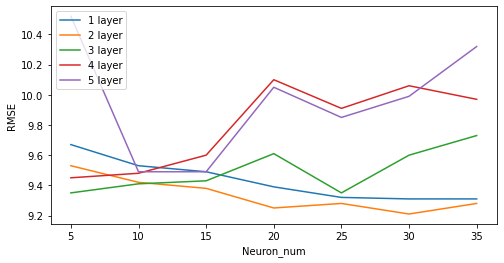

In [45]:
rsme1 = [9.67,9.53,9.49,9.39,9.32,9.31,9.31]
rsme2 = [9.53,9.42,9.38,9.25,9.28,9.21,9.28]
rsme3 = [9.35,9.41,9.43,9.61,9.35,9.60,9.73]
rsme4 = [9.45,9.48,9.60,10.10,9.91,10.06,9.97]
rsme5 = [10.52,9.49,9.49,10.05,9.85,9.99,10.32]

# R2 = 
df = pd.DataFrame({'1 layer':rsme1,'2 layer':rsme2,'3 layer':rsme3,'4 layer':rsme4,'5 layer':rsme5})#,index = ['5','10','15','20','25','30','35'])
df.index = ['5','10','15','20','25','30','35']
fig = df.plot(figsize=(8,4))
plt.ylabel('RMSE') # y轴标签
plt.xlabel('Neuron_num') # y轴标签
plt.legend(loc = 'upper left') 
plt.savefig(r'RMSE.jpg', dpi=400,bbox_inches = 'tight')

In [ ]:
R = [0.381,0.395,0.398,0.414,0.423,0.425]
rsme = [9.67,9.53,9.49,9.39,9.32,9.31]
df = pd.DataFrame(np.random.rand(10,2),columns=['A','B'])
fig = df.plot(figsize=(8,4))  # figsize：创建图表窗口，设置窗口大小
plt.xlabel('X轴')  # x轴标签
plt.ylabel('Y轴') # y轴标签
plt.legend(loc = 'upper right') # 显示图例，loc表示位置
plt.xlim([0,12])  # x轴边界
plt.ylim([0,1.5])  # y轴边界
plt.xticks(range(10))  # 设置x刻度
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])  # 设置y刻度
fig.set_xticklabels("%.1f" %i for i in range(10))  # x轴刻度标签
fig.set_yticklabels("%.2f" %i for i in [0,0.2,0.4,0.6,0.8,1.0,1.2])  # y轴刻度标签
# 这里x轴范围是0-12，但刻度只是0-9，刻度标签使得其显示1位小数


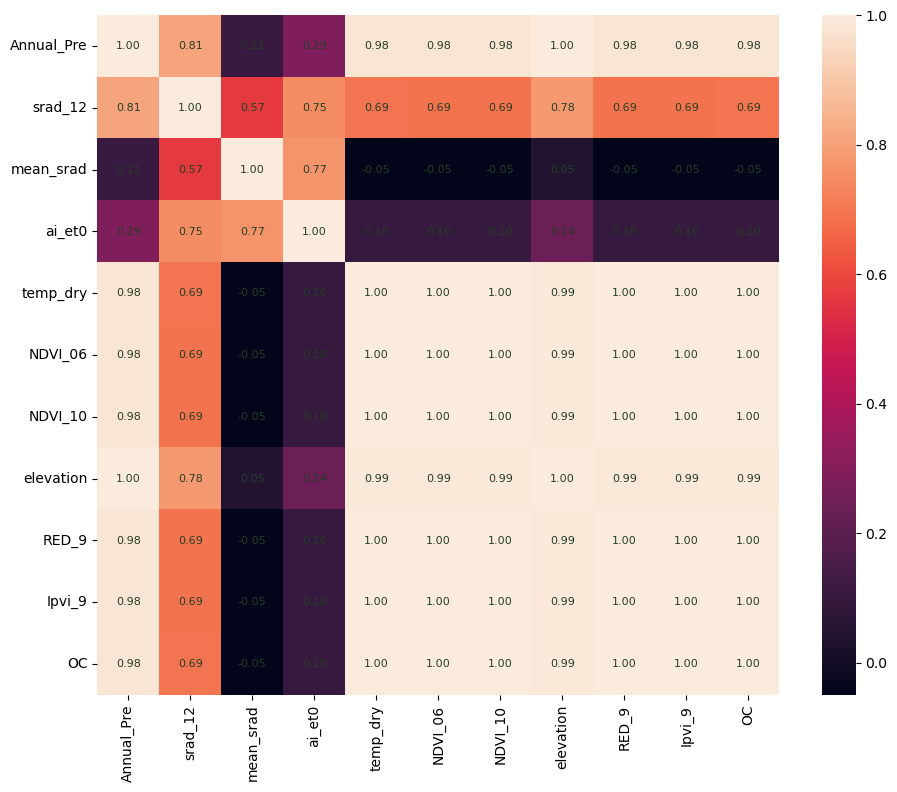

In [78]:
dcorr = a.corr(method='pearson')
plt.figure(figsize=(11, 9),dpi=100)
fig = sns.heatmap(data=dcorr,
                        annot=True,#图中数字文本显示
            fmt=".2f",#格式化输出图中数字，即保留小数位数等
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
           )

AttributeError: 'AxesSubplot' object has no attribute 'savefig'